Understanding the data and feature importance

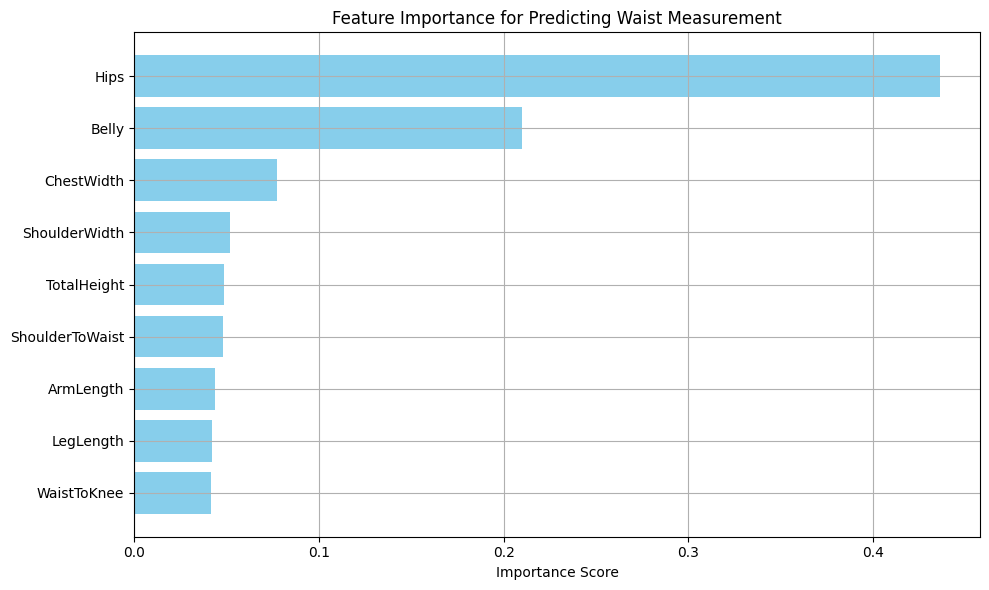

           Feature  Importance
3             Hips    0.436002
2            Belly    0.209706
1       ChestWidth    0.077585
0    ShoulderWidth    0.051978
8      TotalHeight    0.048739
5  ShoulderToWaist    0.048118
4        ArmLength    0.043946
7        LegLength    0.042287
6      WaistToKnee    0.041639


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
# If using Google Colab, upload file or use local path if running locally
df = pd.read_csv("/content/data/Body Measurements _ original_CSV.csv")

# Clean and prepare data
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Define features and target variable
features = [
    'ShoulderWidth', 'ChestWidth', 'Belly', 'Hips', 'ArmLength',
    'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight'
]
X = df[features]
y = df['Waist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance for Predicting Waist Measurement")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.grid(True)
plt.show()

# Print sorted importance values
print(importance_df.sort_values(by='Importance', ascending=False))


Initial 4 models comparison

Model Performance Comparison:
                      Model        MSE       MAE  R2 Score (Accuracy)  \
0             Random Forest  15.821915  2.631485             0.732476   
1         Linear Regression  23.761139  3.614122             0.598236   
2  Support Vector Regressor  23.521952  3.289207             0.602280   
3             Decision Tree  24.419580  3.076923             0.587102   

   CV R2 Score  
0     0.575868  
1     0.407532  
2     0.512898  
3     0.325351  


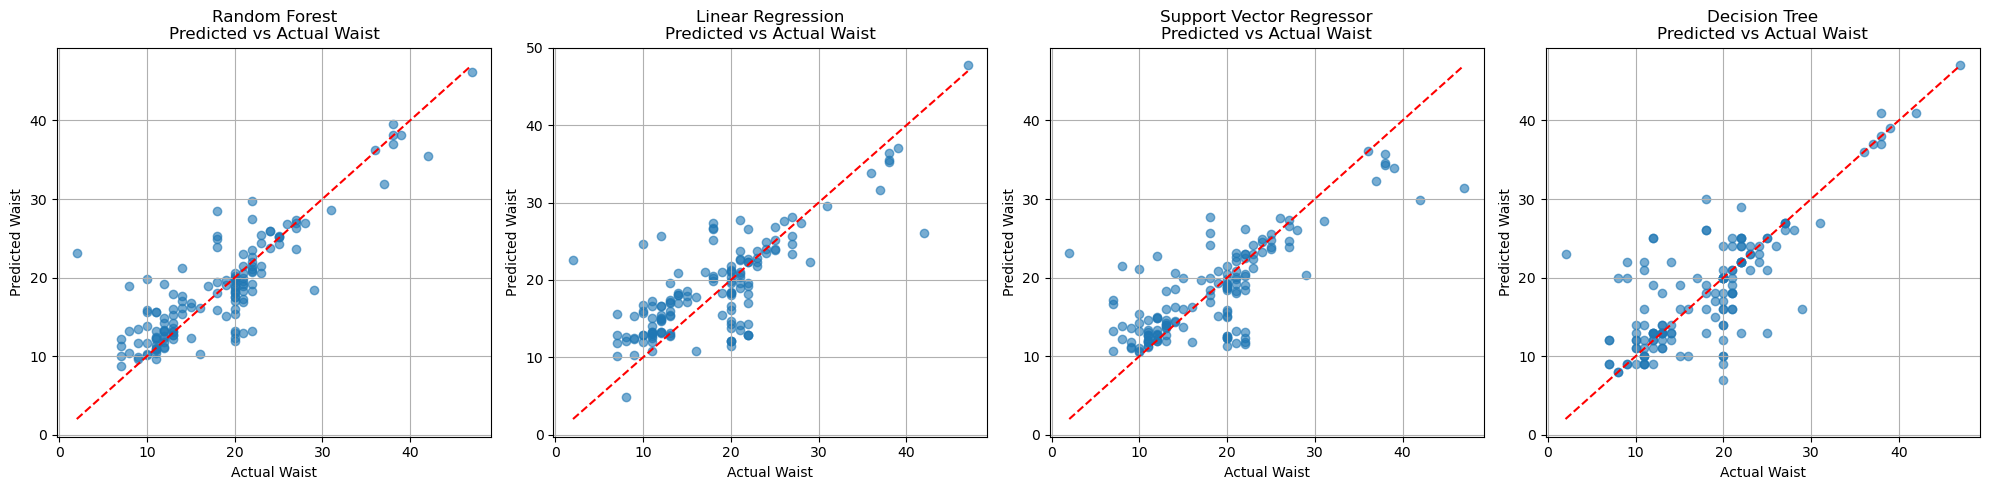

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("Body Measurements _ original_CSV.csv")
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Define features and target
target_column = 'Waist'
feature_columns = ['ShoulderWidth', 'ChestWidth', 'Belly', 'Hips', 'ArmLength',
                   'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']

X = df[feature_columns]
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Evaluation storage
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score (Accuracy)": r2,
        "CV R2 Score": cv_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

# Plot Prediction vs Actual
plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plt.subplot(1, 4, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}\nPredicted vs Actual Waist")
    plt.xlabel("Actual Waist")
    plt.ylabel("Predicted Waist")
    plt.grid(True)

plt.tight_layout()
plt.show()


Model Performance Comparison (Bootstrapped Dataset):
                      Model         MSE       MAE  R2 Score (Accuracy)  \
0             Random Forest   16.926673  1.712808             0.819618   
1         Linear Regression  107.513694  4.980967            -0.145735   
2  Support Vector Regressor   58.090808  4.078305             0.380947   
3             Decision Tree   15.530233  1.334884             0.834500   

   CV R2 Score  
0     0.834787  
1     0.350427  
2     0.476464  
3     0.735021  


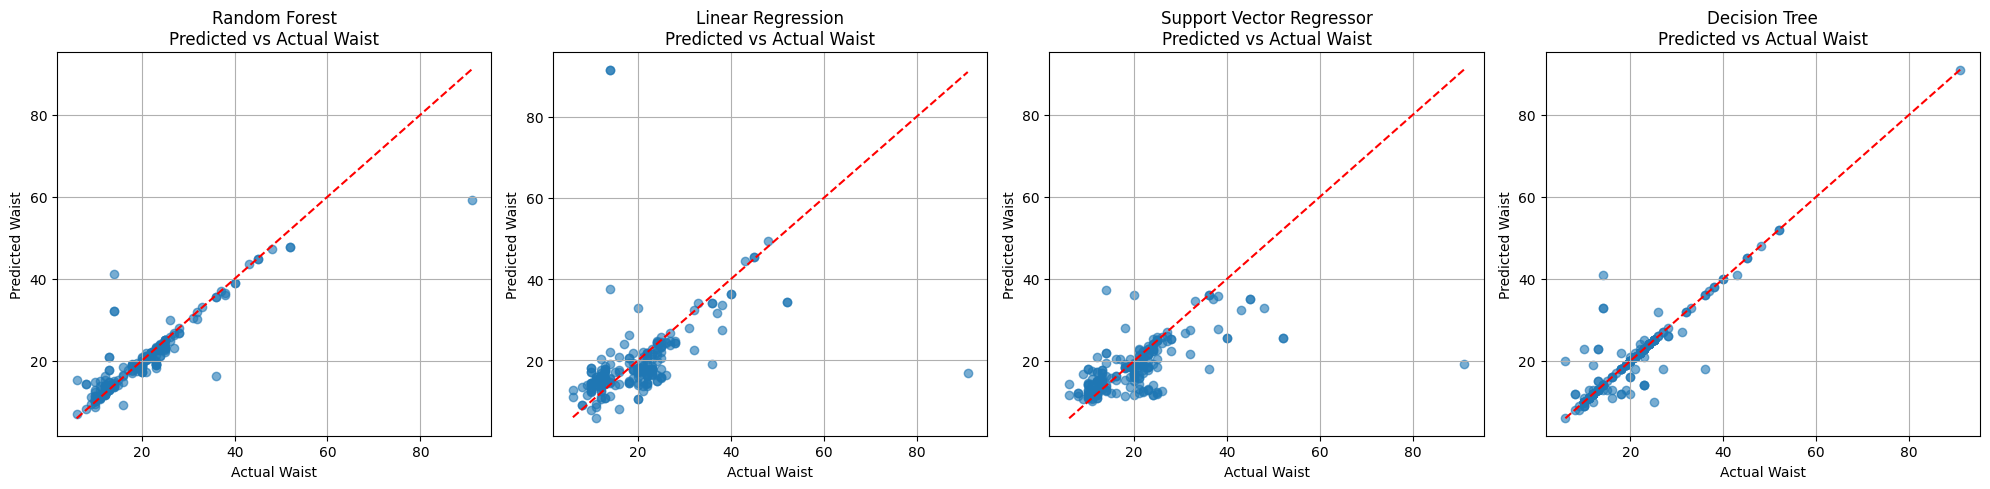

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/content/data/Body Measurements _ original_CSV.csv")
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Bootstrap the dataset (1.5x size)
bootstrapped_df = df.sample(frac=1.5, replace=True, random_state=42)

# Define target and features
target_column = 'Waist'
feature_columns = ['ShoulderWidth', 'ChestWidth', 'Belly', 'Hips', 'ArmLength',
                   'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']

X = bootstrapped_df[feature_columns]
y = bootstrapped_df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Evaluation storage
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score (Accuracy)": r2,
        "CV R2 Score": cv_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison (Bootstrapped Dataset):")
print(results_df)

# Plot Prediction vs Actual
plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plt.subplot(1, 4, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}\nPredicted vs Actual Waist")
    plt.xlabel("Actual Waist")
    plt.ylabel("Predicted Waist")
    plt.grid(True)

plt.tight_layout()
plt.show()


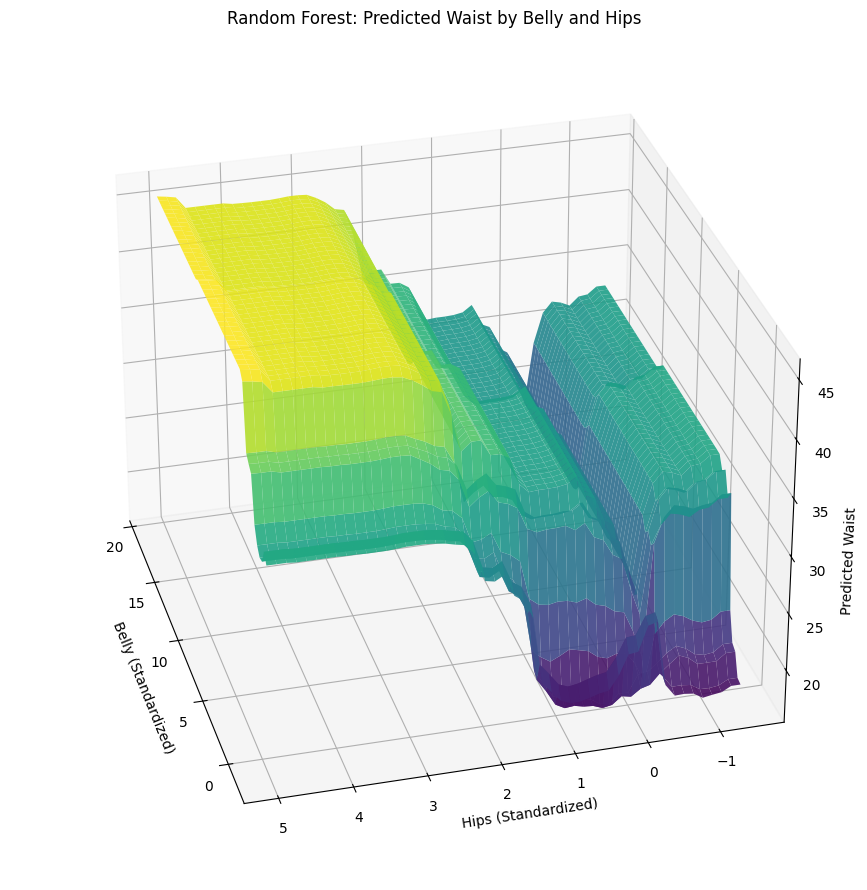

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and clean the dataset
df = pd.read_csv("/content/data/Body Measurements _ original_CSV.csv")
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Feature selection
feature_columns = ['ShoulderWidth', 'ChestWidth', 'Belly', 'Hips', 'ArmLength',
                   'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']
target_column = 'Waist'

X = df[feature_columns]
y = df[target_column]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

# Train Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create mesh grid for Belly and Hips
belly_range = np.linspace(X_scaled_df['Belly'].min(), X_scaled_df['Belly'].max(), 50)
hips_range = np.linspace(X_scaled_df['Hips'].min(), X_scaled_df['Hips'].max(), 50)
belly_grid, hips_grid = np.meshgrid(belly_range, hips_range)

# Prepare synthetic input for predictions
sample = X_scaled_df.iloc[0:1].copy()
synthetic_inputs = sample.loc[sample.index.repeat(50*50)].reset_index(drop=True)
synthetic_inputs['Belly'] = belly_grid.ravel()
synthetic_inputs['Hips'] = hips_grid.ravel()

# Predict Waist using Random Forest
predicted_waist = model.predict(synthetic_inputs).reshape(belly_grid.shape)

# Plotting the 3D surface
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(belly_grid, hips_grid, predicted_waist, cmap='viridis', edgecolor='none', alpha=0.9)

# Axis labels and title
ax.set_xlabel('Belly (Standardized)')
ax.set_ylabel('Hips (Standardized)')
ax.set_zlabel('Predicted Waist')
ax.set_title('Random Forest: Predicted Waist by Belly and Hips')
ax.view_init(elev=30, azim=165)
plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall -y sdv
!pip install sdv



In [ ]:
import sdv
print(sdv.__version__)


1.23.0


Create synthetic data

In [ ]:


# Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Load and clean the CSV
df = pd.read_csv("/content/data/Body Measurements _ original_CSV.csv")
df.columns = df.columns.str.strip()
df.dropna(inplace=True)  # remove rows with missing values

# Create and detect metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

# Initialize the synthesizer
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    enforce_rounding=True,
    enforce_min_max_values=True,
    epochs=300,        # adjust as needed
    batch_size=500,
    verbose=True
)

# Fit the model
synthesizer.fit(df)

# Generate synthetic samples
synthetic_data = synthesizer.sample(num_rows=1000)

# Preview synthetic data
print("Synthetic Data Sample:")
print(synthetic_data.head())



/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-1.97) | Discrim. (0.17): 100%|██████████| 300/300 [00:29<00:00, 10.29it/s]


Synthetic Data Sample:
   Gender  Age  HeadCircumference  ShoulderWidth  ChestWidth  Belly  Waist  \
0     2.0    8                 19             11           8     24     18   
1     1.0   32                 18             15          11     16     18   
2     2.0    4                 10             17          10     41     16   
3     1.0   14                 18             23          10     21     16   
4     2.0   21                 20             13          12     24     11   

   Hips  ArmLength  ShoulderToWaist  WaistToKnee  LegLength  TotalHeight  
0    16         30               20           15         24           30  
1    25         17               11           16          9           29  
2    17         21                9           16         49           47  
3    30         21               14           28         18           43  
4    13         15                8           14         22           37  


In [ ]:
# Save the synthetic data to a new CSV file
output_path = "/content/data/synthetic_body_measurements.csv"
synthetic_data.to_csv(output_path, index=False)
print(f"Synthetic dataset saved to: {output_path}")

Synthetic dataset saved to: /content/data/synthetic_body_measurements.csv


Evaluate the synthetic data

In [ ]:
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot
# Import the QualityReport class to check its type and methods if needed for debugging
from sdmetrics.reports.single_table import QualityReport

# Load and clean real data
real_data = pd.read_csv("/content/data/Body Measurements _ original_CSV.csv")
real_data.columns = real_data.columns.str.strip()
real_data.dropna(inplace=True)

# Build metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)

# Train CTGAN on real data (adjust epochs as needed)
# Ensure batch_size is reasonable given the dataset size. 500 might be too large for smaller datasets.
synthesizer = CTGANSynthesizer(metadata=metadata, enforce_rounding=True,
                               enforce_min_max_values=True, epochs=300, batch_size=500) # Added batch_size from previous cell
synthesizer.fit(real_data)

# Sample synthetic data
synthetic_data = synthesizer.sample(num_rows=len(real_data))

# Diagnostic checks
diagnostic = run_diagnostic(real_data=real_data,
                            synthetic_data=synthetic_data,
                            metadata=metadata)

# In newer versions, the diagnostic report is an object, not a boolean.
# You can access the overall score directly
print("✅ Diagnostic overall status:", diagnostic.get_score())
# To see detailed diagnostic results, you can print the report object
# print(diagnostic)


# Quality evaluation (statistical similarity)
quality_report = evaluate_quality(real_data=real_data,
                                  synthetic_data=synthetic_data,
                                  metadata=metadata)

# Access the overall quality score using .get_score()
overall_quality_score = quality_report.get_score()

print("\n🔍 Quality Report:")
# Print the overall score
print(f"  • Overall Quality Score: {overall_quality_score:.2%}")

# Visual comparison for a sample column, e.g., Waist
fig = get_column_plot(real_data=real_data,
                      synthetic_data=synthetic_data,
                      metadata=metadata,
                      column_name='Waist')
fig.show()

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 1240.83it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 237.75it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

✅ Diagnostic overall status: 1.0
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 615.73it/s]|
Column Shapes Score: 72.86%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 145.32it/s]|
Column Pair Trends Score: 77.64%

Overall Score (Average): 75.25%


🔍 Quality Report:
  • Overall Quality Score: 75.25%


Combine Real and Synthetic data

In [ ]:
import pandas as pd

# Load the real data
real_data_path = "/content/data/Body Measurements _ original_CSV.csv"
real_data = pd.read_csv(real_data_path)

# Clean column names in real data (consistent with previous steps)
real_data.columns = real_data.columns.str.strip()

# Load the synthetic data
synthetic_data_path = "/content/data/synthetic_body_measurements.csv"
synthetic_data = pd.read_csv(synthetic_data_path)

# Combine the dataframes
# Ensure that both dataframes have the same columns and in the same order if necessary
# the synthetic data was generated from the real data, so columns should match.
combined_data = pd.concat([real_data, synthetic_data], ignore_index=True)

# Define the output path for the combined dataset
output_combined_path = "/content/data/combined_data.csv"

# Save the combined dataset to a new CSV file
combined_data.to_csv(output_combined_path, index=False)

print(f"Combined dataset saved to: {output_combined_path}")
print(f"Shape of the combined dataset: {combined_data.shape}")

Combined dataset saved to: /content/data/combined_data.csv
Shape of the combined dataset: (1716, 13)


Model Performance Comparison (Bootstrapped Dataset):
                      Model        MSE       MAE  R2 Score (Accuracy)  \
0             Random Forest  16.418990  2.274816             0.751048   
1         Linear Regression  57.261530  5.656235             0.131776   
2  Support Vector Regressor  50.328759  4.787166             0.236894   
3             Decision Tree  30.499029  1.862136             0.537561   

   CV R2 Score  
0     0.752114  
1     0.097328  
2     0.158953  
3     0.609074  


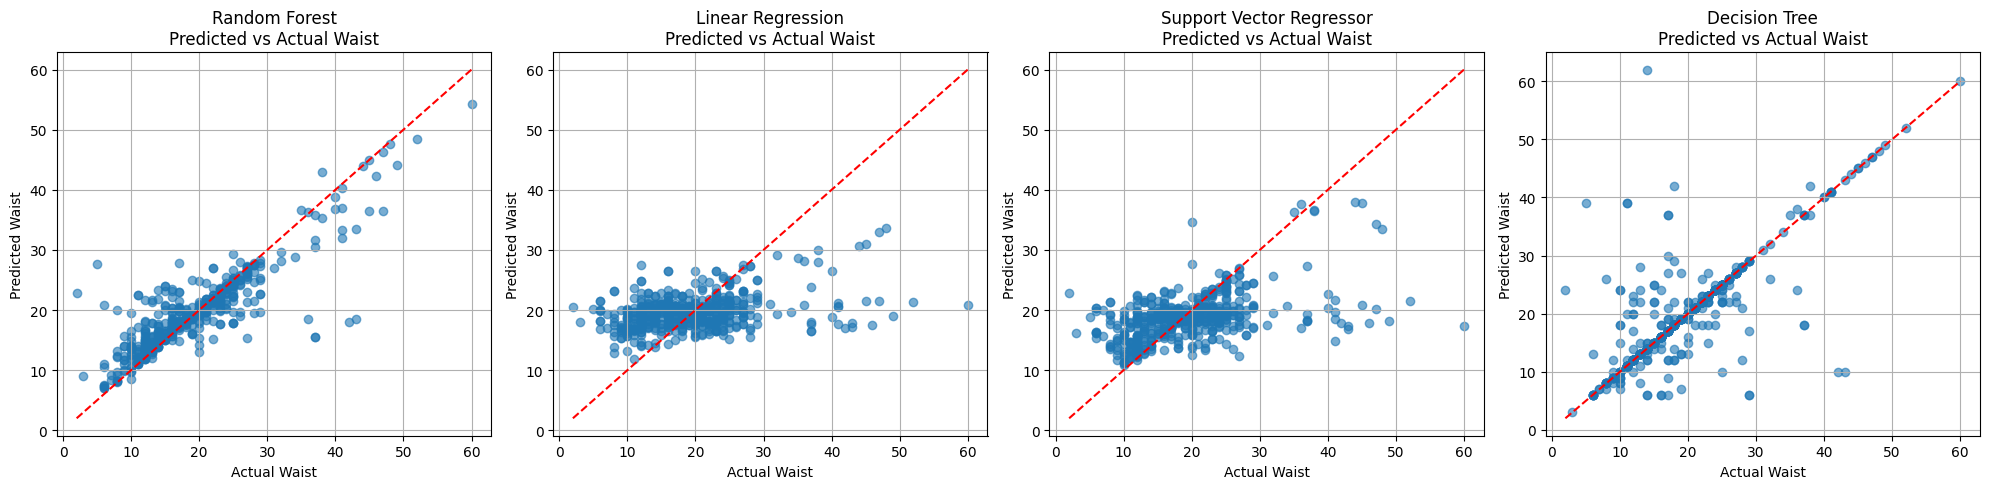

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/content/data/combined_data.csv")
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Bootstrap the dataset (1.5x size)
bootstrapped_df = df.sample(frac=1.5, replace=True, random_state=42)

# Define target and features
target_column = 'Waist'
feature_columns = ['ShoulderWidth', 'ChestWidth', 'Belly', 'Hips', 'ArmLength',
                   'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']

X = bootstrapped_df[feature_columns]
y = bootstrapped_df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Evaluation storage
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score (Accuracy)": r2,
        "CV R2 Score": cv_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison (Bootstrapped Dataset):")
print(results_df)

# Plot Prediction vs Actual
plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plt.subplot(1, 4, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}\nPredicted vs Actual Waist")
    plt.xlabel("Actual Waist")
    plt.ylabel("Predicted Waist")
    plt.grid(True)

plt.tight_layout()
plt.show()

Summary of Hyperparameter Tuning:
Random Forest: n_estimators, max_depth via GridSearchCV

Linear Regression → Ridge Regression: adds alpha for regularization

SVR: custom C=10, gamma='scale'

Decision Tree: max_depth=5 for controlled complexity

Model Performance Comparison (Tuned Models):
                      Model        MSE       MAE  R2 Score (Accuracy)  \
0             Random Forest  16.418990  2.274816             0.751048   
1          Ridge Regression  57.261911  5.656315             0.131770   
2  Support Vector Regressor  43.190633  4.001759             0.345125   
3             Decision Tree  50.331615  5.162635             0.236850   

   CV R2 Score  
0     0.752114  
1     0.097328  
2     0.207540  
3     0.184573  


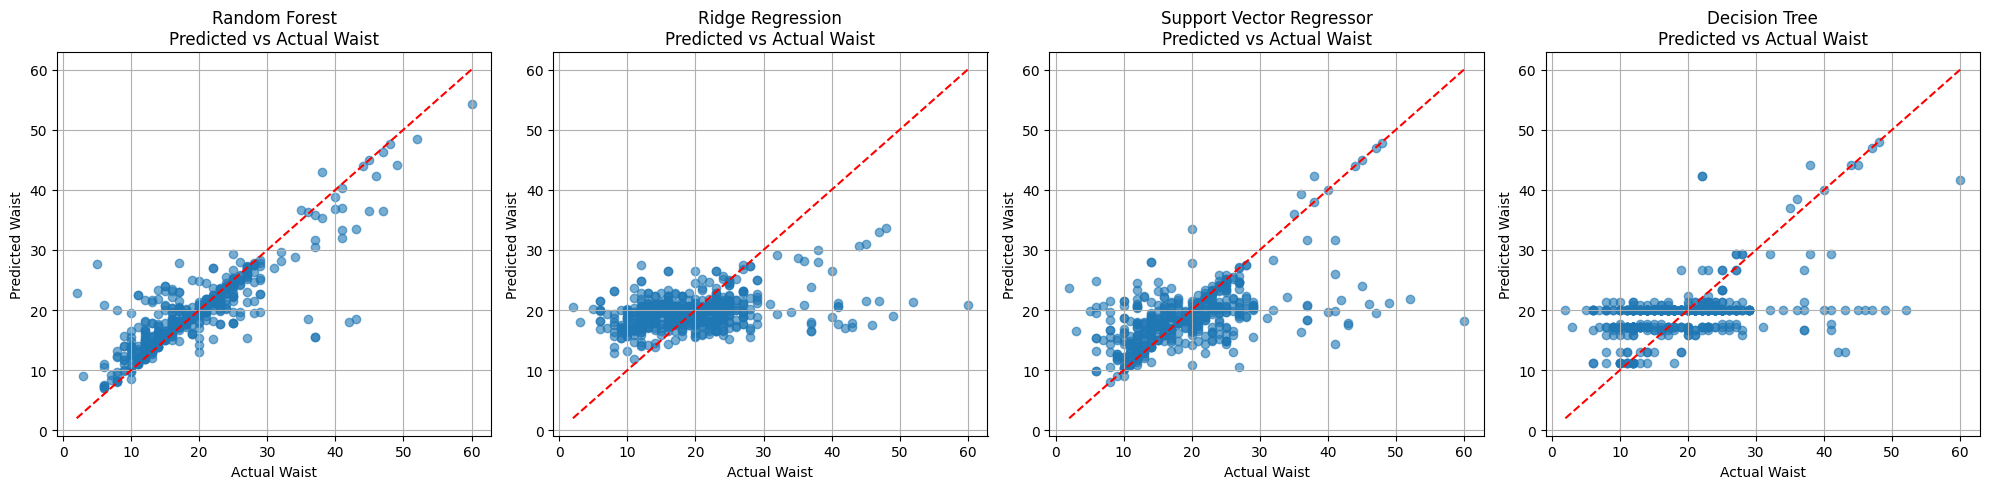

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/content/data/combined_data.csv")
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Bootstrap the dataset (1.5x size)
bootstrapped_df = df.sample(frac=1.5, replace=True, random_state=42)

# Define target and features
target_column = 'Waist'
feature_columns = ['ShoulderWidth', 'ChestWidth', 'Belly', 'Hips', 'ArmLength',
                   'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']

X = bootstrapped_df[feature_columns]
y = bootstrapped_df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models with hyperparameter tuning
tuned_models = {}

# Random Forest with GridSearchCV
rf_params = {'n_estimators': [100, 150], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=kf, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
tuned_models["Random Forest"] = rf_grid.best_estimator_

# Ridge Regression instead of plain Linear Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
tuned_models["Ridge Regression"] = ridge_model

# SVR with tuned C and gamma
svr_model = SVR(C=10, gamma='scale', kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
tuned_models["Support Vector Regressor"] = svr_model

# Decision Tree with max depth
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
tuned_models["Decision Tree"] = dt_model

# Evaluation
results = []
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score (Accuracy)": r2,
        "CV R2 Score": cv_r2
    })

results_df = pd.DataFrame(results)
print("Model Performance Comparison (Tuned Models):")
print(results_df)

# Plot Prediction vs Actual
plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(tuned_models.items()):
    y_pred = model.predict(X_test_scaled)
    plt.subplot(1, 4, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}\nPredicted vs Actual Waist")
    plt.xlabel("Actual Waist")
    plt.ylabel("Predicted Waist")
    plt.grid(True)

plt.tight_layout()
plt.show()


**real vs synthetic data**

Scenario	configurable values
Train on synthetic, test on real	train_real_ratio = 0.0, train_synth_ratio = 1.0
test_real_ratio = 1.0, test_synth_ratio = 0.0
Train and test on real only	train_real_ratio = 1.0, train_synth_ratio = 0.0
test_real_ratio = 1.0, test_synth_ratio = 0.0
Mix training and testing	Adjust real/synth ratios as needed


=== Experiment 1: TRAIN R1.0 + S0.0 | TEST R1.0 + S0.0 ===
Performance Summary:
                      Model        MSE       MAE  R2 Score (Accuracy)  \
0             Random Forest   6.840386  1.665997             0.911041   
1          Ridge Regression  37.422332  3.852109             0.513325   
2  Support Vector Regressor  27.882846  2.562967             0.637385   
3             Decision Tree  19.045885  3.101233             0.752310   

   CV R2 Score  
0     0.563220  
1     0.433347  
2     0.540550  
3     0.340843  


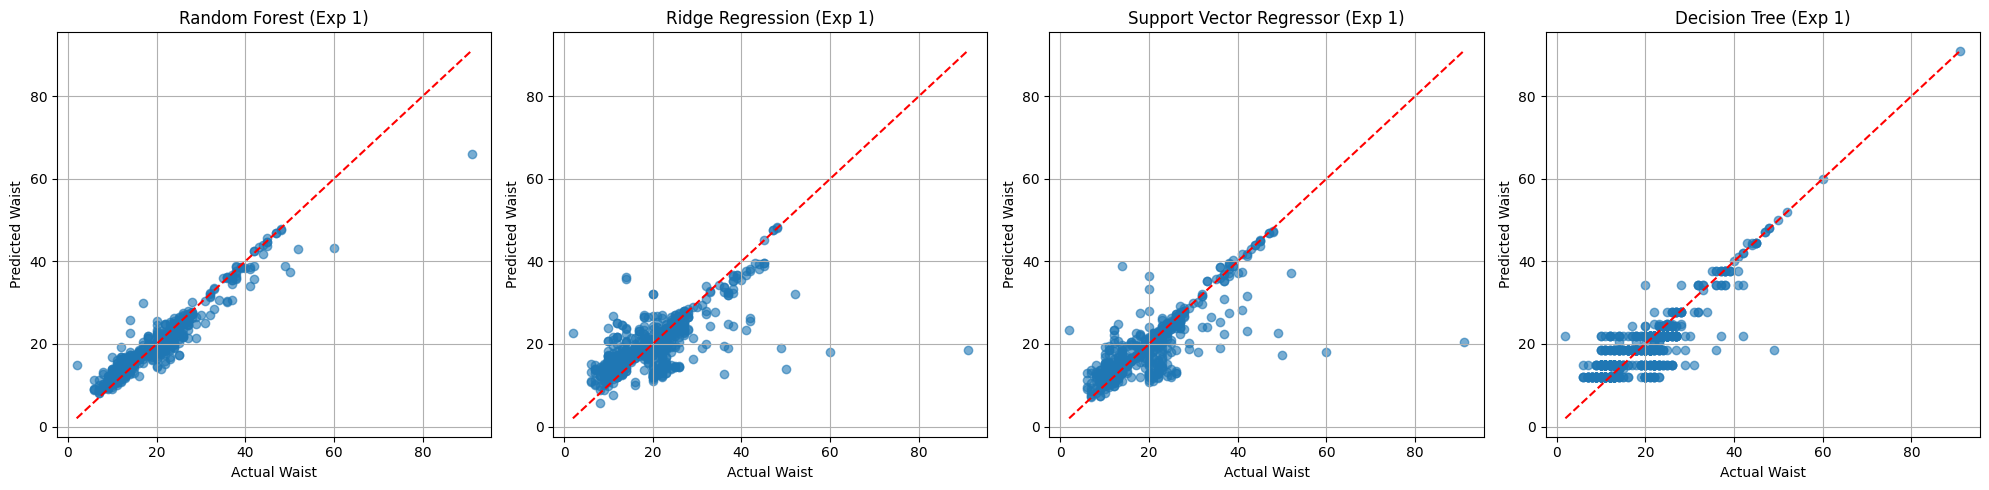


=== Experiment 2: TRAIN R0.0 + S1.0 | TEST R1.0 + S0.0 ===
Performance Summary:
                      Model        MSE       MAE  R2 Score (Accuracy)  \
0             Random Forest  70.398395  6.179890             0.084474   
1          Ridge Regression  70.520421  6.297765             0.082887   
2  Support Vector Regressor  77.653329  6.565824            -0.009876   
3             Decision Tree  89.512552  6.909934            -0.164105   

   CV R2 Score  
0    -0.072603  
1    -0.018976  
2    -0.063262  
3    -0.231184  


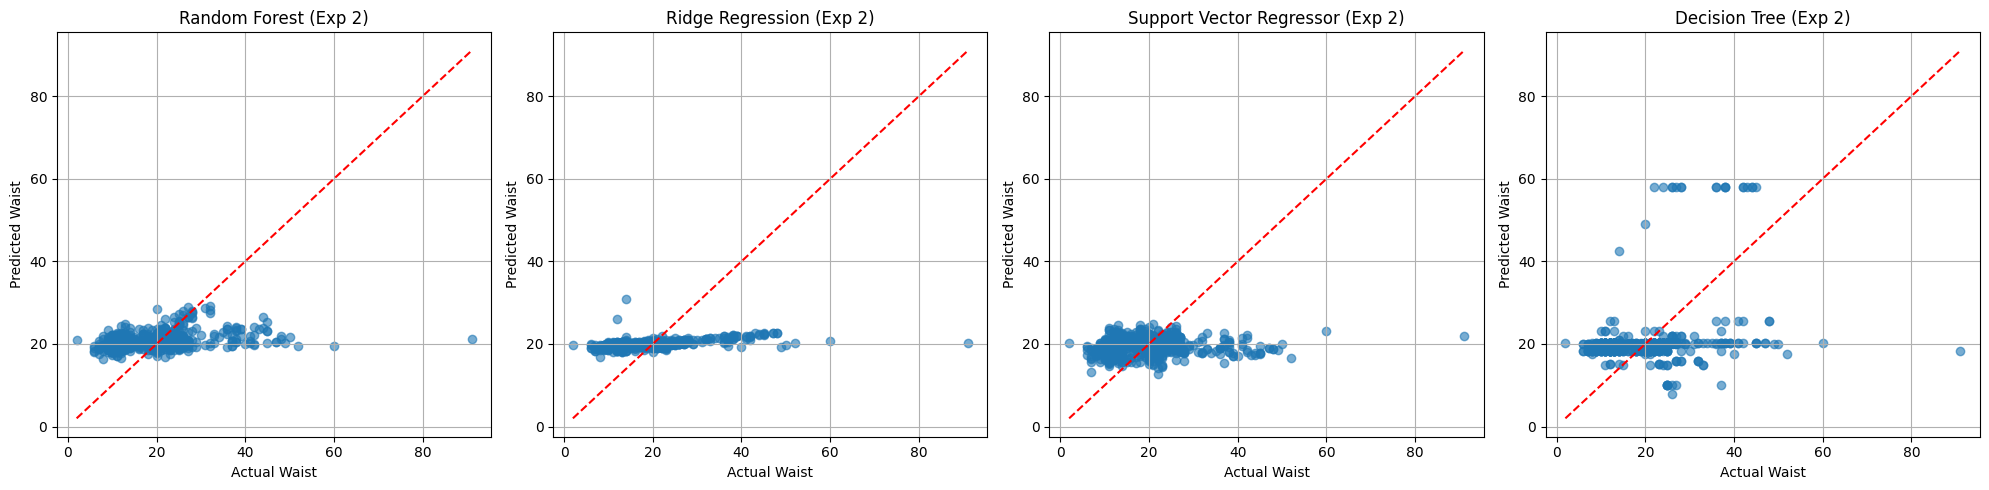


=== Experiment 3: TRAIN R0.5 + S0.5 | TEST R1.0 + S0.0 ===
Performance Summary:
                      Model        MSE       MAE  R2 Score (Accuracy)  \
0             Random Forest  19.626941  2.916586             0.744753   
1          Ridge Regression  48.017951  5.168524             0.375530   
2  Support Vector Regressor  31.757133  3.175379             0.587001   
3             Decision Tree  31.509452  4.142409             0.590222   

   CV R2 Score  
0     0.182489  
1     0.064527  
2     0.149935  
3     0.008930  


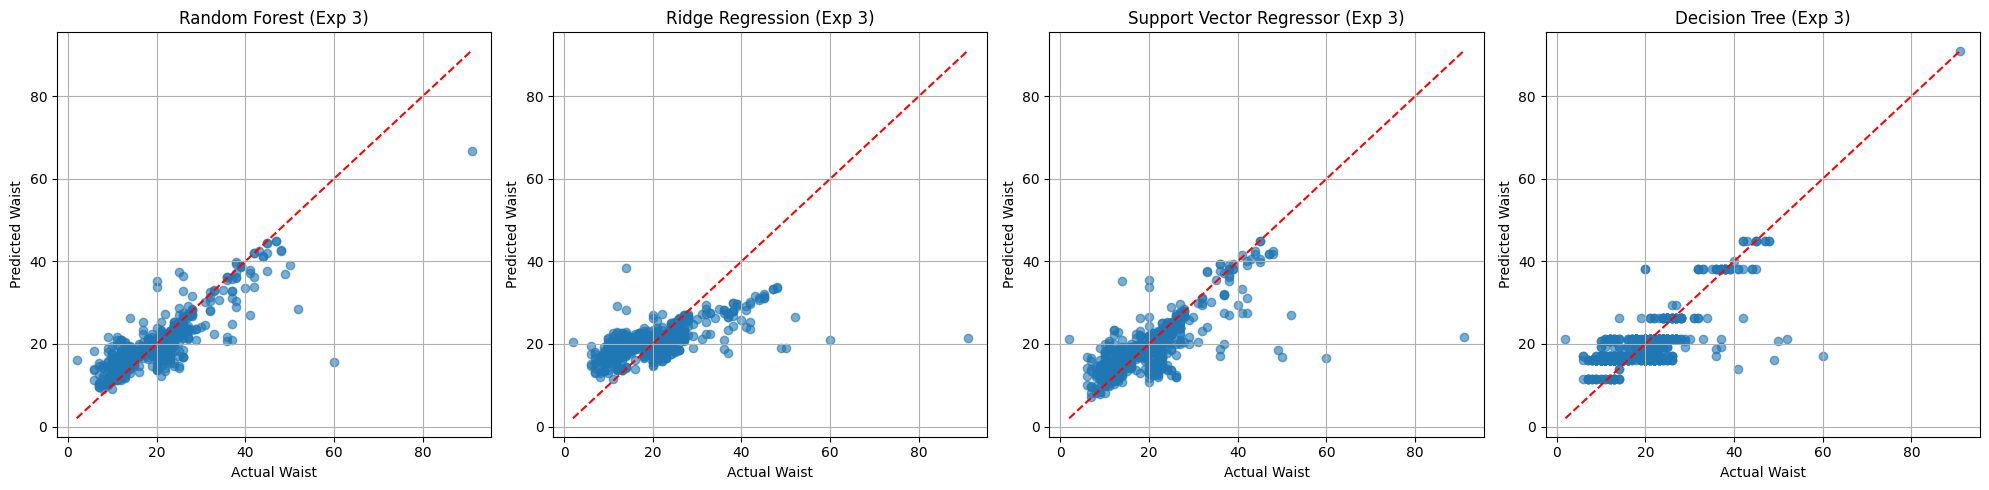

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# File paths
real_data_path = "/content/data/Body Measurements _ original_CSV.csv"
synthetic_data_path = "/content/data/synthetic_body_measurements.csv"

# Load and clean data
real_df = pd.read_csv(real_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

real_df.columns = real_df.columns.str.strip()
synthetic_df.columns = synthetic_df.columns.str.strip()

real_df.dropna(inplace=True)
synthetic_df.dropna(inplace=True)

# Define common columns
target_column = 'Waist'
feature_columns = [
    'ShoulderWidth', 'ChestWidth', 'Belly', 'Hips', 'ArmLength',
    'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight'
]

# Experiment configurations
configs = [
    {"train_real": 1.0, "train_synth": 0.0, "test_real": 1.0, "test_synth": 0.0},
    {"train_real": 0.0, "train_synth": 1.0, "test_real": 1.0, "test_synth": 0.0},
    {"train_real": 0.5, "train_synth": 0.5, "test_real": 1.0, "test_synth": 0.0}
]

# Run experiments
for idx, cfg in enumerate(configs, start=1):
    print(f"\n=== Experiment {idx}: TRAIN R{cfg['train_real']} + S{cfg['train_synth']} | TEST R{cfg['test_real']} + S{cfg['test_synth']} ===")

    # Sample training and testing data
    num_train_real = int(cfg['train_real'] * len(real_df))
    num_train_synth = int(cfg['train_synth'] * len(synthetic_df))
    num_test_real = int(cfg['test_real'] * len(real_df))
    num_test_synth = int(cfg['test_synth'] * len(synthetic_df))

    train_df = pd.concat([
        real_df.sample(n=num_train_real, random_state=42),
        synthetic_df.sample(n=num_train_synth, random_state=42)
    ])
    test_df = pd.concat([
        real_df.sample(n=num_test_real, random_state=101),
        synthetic_df.sample(n=num_test_synth, random_state=101)
    ])

    X_train = train_df[feature_columns]
    y_train = train_df[target_column]
    X_test = test_df[feature_columns]
    y_test = test_df[target_column]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # K-Fold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Train models
    tuned_models = {}

    rf_grid = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid={'n_estimators': [100, 150], 'max_depth': [None, 10]},
        cv=kf, scoring='r2', n_jobs=-1
    )
    rf_grid.fit(X_train_scaled, y_train)
    tuned_models["Random Forest"] = rf_grid.best_estimator_

    tuned_models["Ridge Regression"] = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
    tuned_models["Support Vector Regressor"] = SVR(C=10, gamma='scale').fit(X_train_scaled, y_train)
    tuned_models["Decision Tree"] = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train_scaled, y_train)

    # Evaluate models
    results = []
    for name, model in tuned_models.items():
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        cv_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2').mean()

        results.append({
            "Model": name,
            "MSE": mse,
            "MAE": mae,
            "R2 Score (Accuracy)": r2,
            "CV R2 Score": cv_r2
        })

    results_df = pd.DataFrame(results)
    print("Performance Summary:")
    print(results_df)

    # Plot predictions
    plt.figure(figsize=(20, 5))
    for i, (name, model) in enumerate(tuned_models.items()):
        y_pred = model.predict(X_test_scaled)
        plt.subplot(1, 4, i + 1)
        plt.scatter(y_test, y_pred, alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(f"{name} (Exp {idx})")
        plt.xlabel("Actual Waist")
        plt.ylabel("Predicted Waist")
        plt.grid(True)

    plt.tight_layout()
    plt.show()
